In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("london_merged.csv")

In [3]:
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


Metadata:
- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "windspeed" - wind speed in km/h
- "weathercode" - category of the weather
- "isholiday" - boolean field - 1 holiday / 0 non holiday
- "isweekend" - boolean field - 1 if the day is weekend
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

- "weather_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
data['weather_code'].value_counts()
#one hot encoding required

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [6]:
data['is_weekend'].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [7]:
data['is_holiday'].value_counts()

0.0    17030
1.0      384
Name: is_holiday, dtype: int64

In [8]:
data.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

## Preprocessing

In [9]:
def data_preparation(df):
  df = df.copy()

  #Handling the timestamp column. Extract month, day, and hour from it.
  df['timestamp'] = pd.to_datetime(df['timestamp']) #datetime object
  df['month'] = df['timestamp'].apply(lambda x: x.month) #extract month from datetime object
  df['day'] = df['timestamp'].apply(lambda x: x.day) #extract day from the datetime object
  df['hour'] = df['timestamp'].apply(lambda x: x.hour) #extract hour from the datetime object

  #Now we can drop the actual timestamp column
  df = df.drop("timestamp", axis=1)

  

  return df

In [10]:
X = data_preparation(data)

In [11]:
X

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,4,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,4,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,4,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,1,3,19
17410,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,1,3,20
17411,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,1,3,21
17412,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,1,3,22


# Using PyCaret

In [12]:
!pip install pycaret

In [13]:
import pycaret.regression as pyr

In [14]:
pyr.setup(
    data = X,
    target = 'cnt',
    train_size = 0.7,
    normalize = True
)

,Description,Value
0,session_id,6176
1,Target,cnt
2,Original Data,"(17414, 12)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12189, 22)"


(False,
 {'ada': <pycaret.containers.models.regression.AdaBoostRegressorContainer at 0x7f9f8012bb90>,
  'ard': <pycaret.containers.models.regression.AutomaticRelevanceDeterminationContainer at 0x7f9f800cd310>,
  'br': <pycaret.containers.models.regression.BayesianRidgeContainer at 0x7f9f800cd650>,
  'dt': <pycaret.containers.models.regression.DecisionTreeRegressorContainer at 0x7f9f8012be50>,
  'en': <pycaret.containers.models.regression.ElasticNetContainer at 0x7f9f800cd910>,
  'et': <pycaret.containers.models.regression.ExtraTreesRegressorContainer at 0x7f9f8012b850>,
  'gbr': <pycaret.containers.models.regression.GradientBoostingRegressorContainer at 0x7f9f8012b590>,
  'huber': <pycaret.containers.models.regression.HuberRegressorContainer at 0x7f9f800c2a50>,
  'knn': <pycaret.containers.models.regression.KNeighborsRegressorContainer at 0x7f9f8012bf90>,
  'kr': <pycaret.containers.models.regression.KernelRidgeContainer at 0x7f9f800c2790>,
  'lar': <pycaret.containers.models.regressio

In [15]:
pyr.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,138.1620,53801.9333,231.6848,0.9549,0.3174,0.2359,0.212
et,Extra Trees Regressor,134.5704,54764.3952,233.8022,0.9541,0.2609,0.1992,3.404
rf,Random Forest Regressor,136.2977,56745.6909,238.0233,0.9524,0.2572,0.1955,4.252
dt,Decision Tree Regressor,187.1514,114403.1473,337.5216,0.9044,0.3430,0.2517,0.089
gbr,Gradient Boosting Regressor,251.0226,144267.9094,379.6743,0.8791,0.6408,0.5925,0.944
knn,K Neighbors Regressor,479.4583,549486.0281,741.0701,0.5398,0.8399,1.2928,0.166
ada,AdaBoost Regressor,725.8378,763436.5550,872.5280,0.3612,1.1193,2.3480,0.669
lr,Linear Regression,663.1524,827656.3500,909.3627,0.3072,1.1214,2.0873,0.337
ridge,Ridge Regression,663.1451,827653.2562,909.3609,0.3072,1.1214,2.0870,0.031
lar,Least Angle Regression,663.1400,827646.1981,909.3572,0.3072,1.1214,2.0873,0.034


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=6176, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [16]:
best_model = pyr.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,135.9032,44625.2955,211.2470,0.9639,0.3078,0.2434
1,135.7753,52858.9781,229.9108,0.9556,0.3263,0.2271
2,148.2435,65848.3783,256.6094,0.9475,0.3262,0.2382
3,132.4697,50729.9400,225.2331,0.9566,0.3311,0.2257
4,136.9375,52974.1770,230.1612,0.9574,0.3248,0.2502
5,139.8786,53494.7510,231.2893,0.9554,0.2931,0.2316
6,137.4022,57401.7158,239.5866,0.9471,0.3211,0.2492
7,140.6010,50341.5207,224.3692,0.9574,0.3316,0.2443
8,139.1824,53183.6694,230.6158,0.9563,0.2975,0.2250
9,135.2267,56560.9068,237.8254,0.9514,0.3148,0.2246


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

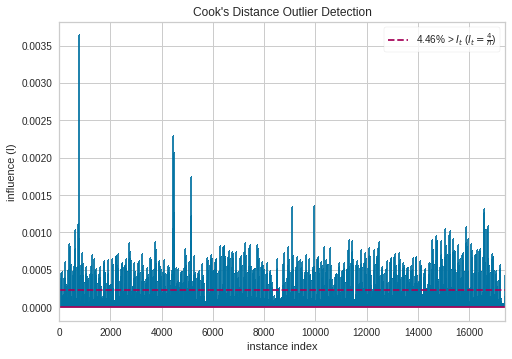

In [18]:
pyr.evaluate_model(best_model)

In [29]:
X

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,4,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,4,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,4,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,1,3,19
17410,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,1,3,20
17411,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,1,3,21
17412,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,1,3,22


In [46]:
unseen_data = X.drop("cnt", axis=1)
unseen_data

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,4,0
1,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,1
2,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,4,2
3,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,4,3
4,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...
17409,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,1,3,19
17410,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,1,3,20
17411,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,1,3,21
17412,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,1,3,22


In [47]:
result = pyr.predict_model(best_model, data=unseen_data)
print(result)

        t1   t2    hum  wind_speed  ...  month  day  hour        Label
0      3.0  2.0   93.0         6.0  ...      1    4     0   217.192958
1      3.0  2.5   93.0         5.0  ...      1    4     1   191.800882
2      2.5  2.5   96.5         0.0  ...      1    4     2   116.433696
3      2.0  2.0  100.0         0.0  ...      1    4     3    67.345656
4      2.0  0.0   93.0         6.5  ...      1    4     4    48.586363
...    ...  ...    ...         ...  ...    ...  ...   ...          ...
17409  5.0  1.0   81.0        19.0  ...      1    3    19  1154.445584
17410  5.0  1.0   81.0        21.0  ...      1    3    20   643.537667
17411  5.5  1.5   78.5        24.0  ...      1    3    21   486.113999
17412  5.5  1.5   76.0        23.0  ...      1    3    22   389.798442
17413  5.0  1.0   76.0        22.0  ...      1    3    23   280.612449

[17414 rows x 12 columns]


In [48]:
result.to_csv("prediction.csv")

# Using Sklearn's Pipeline

In [59]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [60]:
def pipeline_data(df):
  df = df.copy()

  #Handling the timestamp column. Extract month, day, and hour from it.
  df['timestamp'] = pd.to_datetime(df['timestamp']) #datetime object
  df['month'] = df['timestamp'].apply(lambda x: x.month) #extract month from datetime object
  df['day'] = df['timestamp'].apply(lambda x: x.day) #extract day from the datetime object
  df['hour'] = df['timestamp'].apply(lambda x: x.hour) #extract hour from the datetime object

  #Now we can drop the actual timestamp column
  df = df.drop("timestamp", axis=1)

  #X and y
  X = df.drop("cnt", axis=1)
  y = df['cnt']

  #split
  X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, shuffle=True, random_state=1)

  

  return X_train, X_test, y_train, y_test

In [61]:
X_train, X_test, y_train, y_test = pipeline_data(data)

In [62]:
X_train

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
1930,8.0,5.5,64.0,13.0,3.0,0.0,0.0,0.0,3,25,12
14312,21.0,21.0,83.0,8.5,2.0,0.0,0.0,1.0,8,26,3
2542,5.0,4.5,87.0,5.0,1.0,0.0,0.0,0.0,4,20,6
16732,10.0,10.0,88.0,3.0,3.0,0.0,0.0,3.0,12,6,14
5815,14.0,14.0,63.0,13.0,1.0,0.0,0.0,2.0,9,3,22
...,...,...,...,...,...,...,...,...,...,...,...
10955,6.5,2.5,73.5,26.0,7.0,0.0,0.0,0.0,4,7,7
17289,5.5,4.0,84.0,6.5,1.0,0.0,0.0,3.0,12,29,19
5192,19.0,19.0,64.0,8.0,1.0,0.0,1.0,1.0,8,8,23
12172,12.5,12.5,85.0,9.0,1.0,0.0,1.0,0.0,5,28,1


In [63]:
y_train

1930      948
14312      81
2542      603
16732    1012
5815      614
         ... 
10955    1864
17289     650
5192      967
12172     388
235       947
Name: cnt, Length: 12189, dtype: int64

## Building the Pipeline

In [64]:
nominal_transformer = Pipeline(steps=[
                                      ("onehot", OneHotEncoder(sparse=False))
])

preprocessor = ColumnTransformer(transformers=[
                                               ("nominal", nominal_transformer, ['weather_code'])
], remainder = 'passthrough')

model = Pipeline(steps=[
                        ('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())
])

In [65]:
estimator = model.fit(X_train, y_train)

## Evaluation

# R-Square

In [71]:
y_true = np.array(y_test)
print(y_true)
y_pred = estimator.predict(X_test)
print(y_pred)

[ 201  867 1435 ...  205  236 2065]
[ 208.67  699.1  1352.28 ...  198.16  183.71 2441.01]


In [72]:
print("Model R^2 Score: {:.4f}".format(r2_score(y_true, y_pred)))

Model R^2 Score: 0.9596


## RMSE

In [73]:
print(np.mean((y_test - y_pred) ** 2))

47677.60653546409


In [74]:
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("RMSE is:", rmse)

RMSE is: 218.35202434478157
